# Introduction

As per date (Aug 26, 2020):
* Coronavirus Cases: 24,005,460
* Deaths: 821,578
* Recovered: 16,485,396

Stay Home, Stay Safe.

We will deep dive into the dataset and find interesting insights. Created visualisations using plotly library and did dataset manipulation using numpy package.

To Do:
* Importing Libraries
* EDA and Visualisations
* Sentiment Analysis
* Results

Hope you like it! <font color = "red">Please Upvote!</font>

![](https://pbs.twimg.com/media/EQgP2pUW4AA0BkC?format=jpg&name=medium)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize #(word tokenize, sentence tokenize)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import re, string, unicodedata

from PIL import Image
import requests
from io import BytesIO
from wordcloud import ImageColorGenerator
from textblob import TextBlob

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable = True)
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Dataset

In [2]:
tweets = pd.read_csv('../input/covid19-tweets/covid19_tweets.csv')
tweets.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166656 entries, 0 to 166655
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         166656 non-null  object
 1   user_location     132735 non-null  object
 2   user_description  157190 non-null  object
 3   user_created      166656 non-null  object
 4   user_followers    166656 non-null  int64 
 5   user_friends      166656 non-null  int64 
 6   user_favourites   166656 non-null  int64 
 7   user_verified     166656 non-null  bool  
 8   date              166656 non-null  object
 9   text              166656 non-null  object
 10  hashtags          118917 non-null  object
 11  source            166597 non-null  object
 12  is_retweet        166656 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 14.3+ MB


In [4]:
tweets.describe()

user_followers   user_friends  user_favourites
count    1.666560e+05  166656.000000     1.666560e+05
mean     1.086442e+05    2092.492938     1.417986e+04
std      8.337837e+05    8995.094287     4.378791e+04
min      0.000000e+00       0.000000     0.000000e+00
25%      1.730000e+02     148.000000     2.030000e+02
50%      9.980000e+02     541.000000     1.753000e+03
75%      5.321000e+03    1711.000000     9.154000e+03
max      4.944256e+07  497363.000000     2.047197e+06

**Missing Values Visualisation**

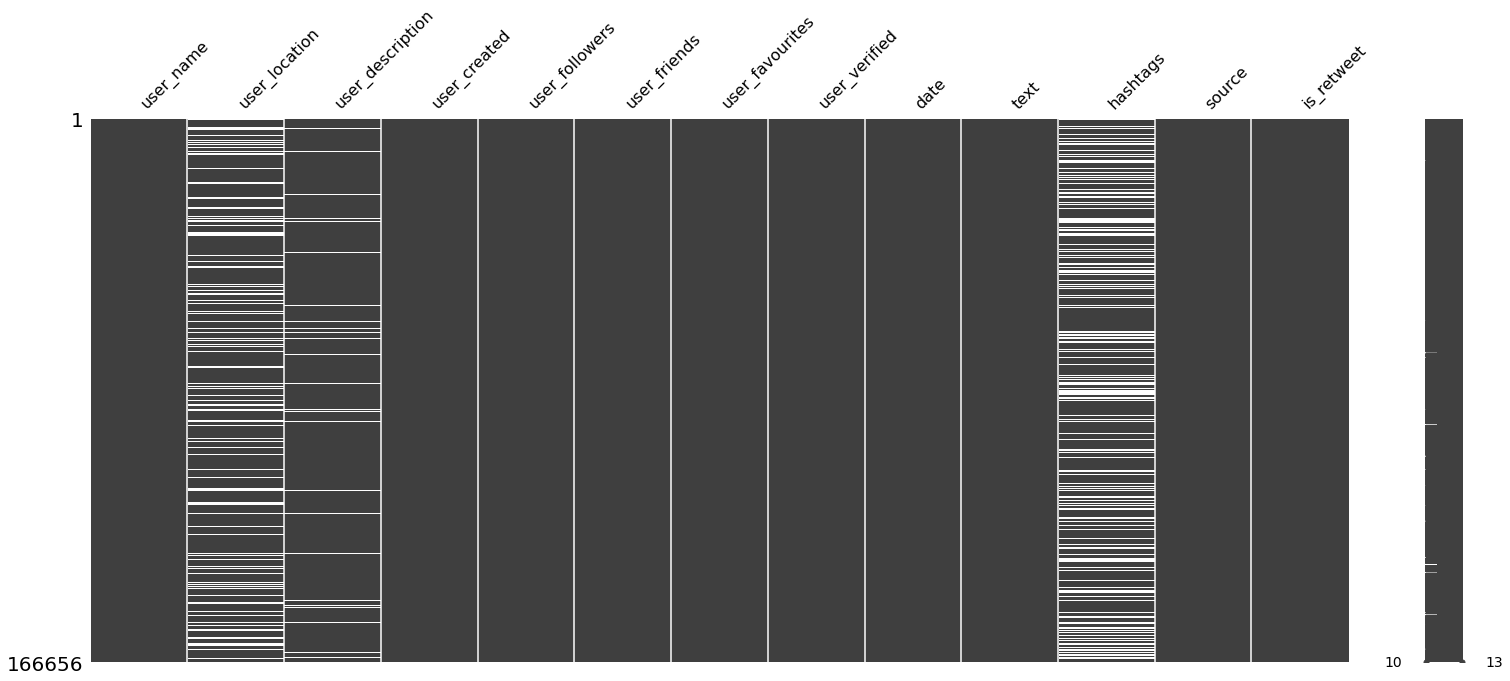

In [5]:
msno.matrix(tweets)
#white lines tells the missing values.

**Adding Additional Columns**

In [6]:
tweets['date'] = pd.to_datetime(tweets["date"])
tweets['count'] = 1
tweets['tweet_date'] = tweets['date'].apply(lambda x: x.date())
tweets['day_sent'] = tweets['date'].dt.strftime('%a')
tweets['month_sent'] = tweets['date'].dt.strftime('%b')
tweets['hour_sent'] = tweets['date'].apply(lambda x: x.hour)

In [7]:
tweets.head(3)

user_name     user_location  \
0           ᏉᎥ☻լꂅϮ        astroworld   
1    Tom Basile 🇺🇸      New York, NY   
2  Time4fisticuffs  Pewee Valley, KY   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   

                 date                                               text  \
0 2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1 2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2 2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   

      hashtags               source  is_retweet  count  tweet_date day_sent  \
0          NaN   Twitter for iPhone       False      1  2020-07-25      Sat   
1          NaN  Twitter for Android       False      1  2020-07-25      Sat   
2  ['COVID19']  Twitter for Android       False      1  2020-07-25      Sat   

  month_sent  hour_sent  
0        Jul         12  
1        Jul         12  
2        Jul         12

# Exploratory Data Analysis

**Tweet Counts Vs Verified User Tweets**

In [8]:
groupedby_date = tweets.groupby('tweet_date').sum().reset_index()

fig = go.Figure(data=[
    go.Bar(name = 'Verified Users', x = groupedby_date['tweet_date'], y = groupedby_date['user_verified'].tolist()),
    go.Bar(name = 'Count Of Tweets', x = groupedby_date['tweet_date'], y= groupedby_date['count'].tolist())])

fig.update_layout(barmode='stack')
fig.show()

**Coorelation Matrix**

In [9]:
#Correlation matrix
tweets[['user_followers', 'user_friends',
        'user_favourites', 'user_verified']].corr().iplot(kind='heatmap',
                                                          colorscale="Blues",
                                                          title="Feature Correlation Matrix")

**Word Cloud (Hashtags)**

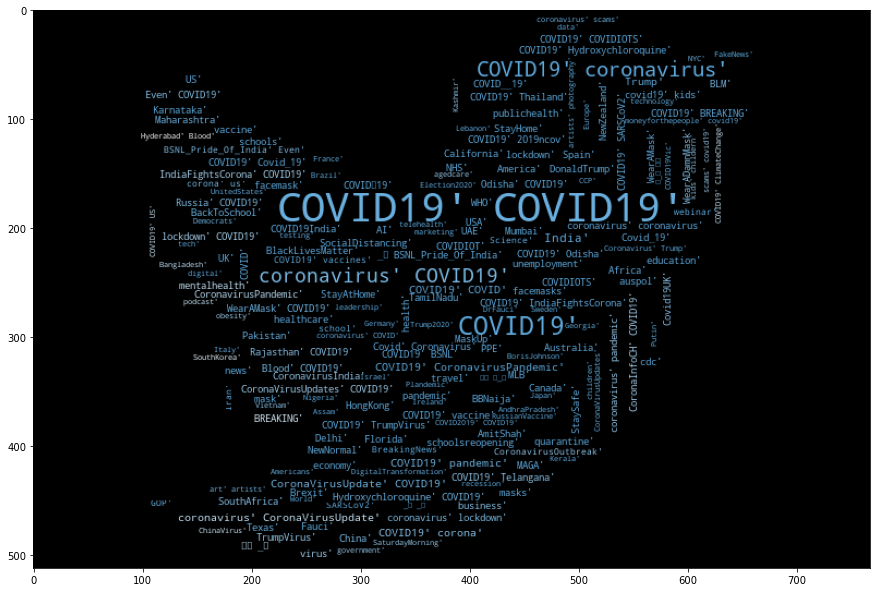

In [10]:
hashtags = tweets['hashtags'].dropna().tolist()
unique_hashtags=(" ").join(hashtags)

response = requests.get('https://www.lifewire.com/thmb/Q-QChfPXsb8id3pvLrcXsn2oQNs=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/twitterlogo-6471b86764ac4076b70f645e632b899e.jpg')
char_mask = np.array(Image.open(BytesIO(response.content)))
image_colors = ImageColorGenerator(char_mask)
plt.figure(figsize = (15,15))
wc = WordCloud(background_color="black", max_words=200, width=400, height=400, mask=char_mask, random_state=1).generate(unique_hashtags)
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors))

**Top 15 Regions : Tweet Counts**

In [11]:
#Top15_regions
Top15_regions = pd.DataFrame(tweets['user_location'].value_counts().sort_values(ascending=False)[:15]).T
colors = ['lightslategray',] * 15
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(x=Top15_regions.columns,
                             y=[Top15_regions[i][0] for i in Top15_regions],
                             marker_color=colors)])
fig.update_layout(title_text='Tweets on User Location')

**Top 10 Sources : To Do Tweets**

In [12]:
Top10_source = pd.DataFrame(tweets['source'].value_counts().sort_values(ascending=False)[:10]).T
colors = ['lightslategray',] * 10
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(x=Top10_source.columns,
                             y=[Top10_source[i][0] for i in Top10_source],
                             marker_color=colors)])
fig.update_layout(title_text='Different source used for tweeting.')

**Heatmap: Tweet Counts as per month and days**

In [13]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
months = ['Jul', 'Aug']

grouped_by_month_and_day = tweets.groupby(['month_sent', 'day_sent']).sum().reset_index()[['month_sent', 'day_sent', 'count']]
pt = grouped_by_month_and_day.pivot_table(index = 'month_sent', columns = 'day_sent', values = 'count').reindex(index = months, columns = days)
pt.iplot(kind='heatmap',colorscale="Blues", title="Heatmap of tweets count as per month and days")

**Timeline: Tweet Counts on 24hrs basis**

In [14]:
grouped_by_time = tweets.groupby('hour_sent').sum().reset_index().sort_values(by = 'count', ascending = False)
fig = px.bar(grouped_by_time, x='hour_sent', y='count', color='hour_sent', 
             labels={'pop':'Count Of Tweets'}, height=400)
fig.show()

**Most Used Words: Tweet**

In [15]:
#Most Used Words in tweets
word_dict = dict.fromkeys(tweets['user_name'].unique()) #collecting all unique userids
for key in word_dict.keys():
  word_dict[key] = {}

for name, msg in zip(tweets['user_name'], tweets['text']):
  for word in msg.split():
    #any media is included then that is excluded
    if word not in ['<Media', 'omitted>']:
      if word in word_dict[name]:
        word_dict[name][word] += 1
      else:
        word_dict[name][word] = 1

for name in tweets['user_name'].unique():
  word_dict[name] = {k: v for k, v in sorted(word_dict[name].items(), 
                                             key = lambda item: item[1], reverse= True)}

In [16]:
grouped_df = tweets.groupby('user_name').sum().reset_index()
grouped_df['Most used words'] = grouped_df['user_name'].apply(lambda x : word_dict[x])
grouped_df[['user_name', 'Most used words']]

user_name  \
0                          2Civility   
1                             Corona   
2                                 !F   
3                         !Gau Khoeb   
4                    !n$@n R@j₩!nd€R   
...                              ...   
87441        🧶🧶🧶 unravellednurse 🧶🧶🧶   
87442                 🧻Andrew Clark🧻   
87443  🩸🦷Murphy🩸🦷 #WarrenProgressive   
87444                  🪐V∆NT∆ BL∆©K🪐   
87445                       🪐𝚂𝚝𝚘𝚍𝚒𝚞𝚜   

                                         Most used words  
0      {'to': 2, '“As': 1, 'we': 1, 'continue': 1, 'l...  
1      {'@realDonaldTrump': 1, 'some': 1, 'facts': 1,...  
2      {'156': 1, 'new': 1, 'cases..where': 1, 'we': ...  
3      {'to': 2, '@tito_mboweni': 1, '@SEKHUKHUNE745'...  
4      {'@Parul53709603': 1, 'If': 1, 'u': 1, 'want':...  
...                                                  ...  
87441  {'the': 2, 'to': 2, 'Surely': 1, '@RoyalAged':...  
87442  {'the': 2, 'Yes': 1, 'I': 1, 'can': 1, 'explai...  
87443  {'Does': 1, 'anyone': 1, 'know': 1, 'if': 1, '...  
87444  {'Could': 1, '#Statins': 1, 'Reduce': 1, 'the'...  
87445  {'The': 1, 'power': 1, 'of': 1, 'indoctrinatio...  

[87446 rows x 2 columns]

# Tweet Analysis 

# Vocabulary

In [17]:
#crating vocab for the tweets
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus = get_corpus(tweets.text)

In [18]:
from collections import Counter
counter = Counter(corpus)
most_common_words = counter.most_common(10) #prining most common 10 words
most_common_words = dict(most_common_words)
most_common_words

{'the': 81282,
 'to': 66568,
 '#COVID19': 64009,
 'of': 53268,
 'in': 45094,
 'and': 38794,
 'a': 38022,
 'is': 29640,
 'for': 27055,
 'on': 19969}

# Data Cleaning

In [19]:
#Data Cleaning - Part-1
stop_words = set(stopwords.words('english')) #set of all stopwords
punctuation = list(string.punctuation) #all punctuation
#adding everything into one set
stop_words.update(punctuation)

def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def url_extract(text):
    return re.sub(r'http\S+', '', text)

def stopwords(text):
    final_text = []
    for i in text.split():
        #checking in stopwords and also lowering the text
        if i.strip().lower() not in stop_words:
            final_text.append(i.strip())
    return " ".join(final_text)

#finally getting all outputs in preprocessing the text using above functions
def preprocess(text):
    text = strip_html(text)
    text = square_brackets(text)
    text = url_extract(text)
    text = stopwords(text)
    return text

In [20]:
tweets['text'] = tweets['text'].apply(preprocess)

In [21]:
#processed tweets
tweets['text'].head(5)

0    smelled scent hand sanitizers today someone pa...
1    Hey @Yankees @YankeesPR @MLB made sense player...
2    @diane3443 @wdunlap @realDonaldTrump Trump nev...
3    @brookbanktv one gift #COVID19 give appreciati...
4    25 July Media Bulletin Novel #CoronaVirusUpdat...
Name: text, dtype: object

# WordCloud: Tweets

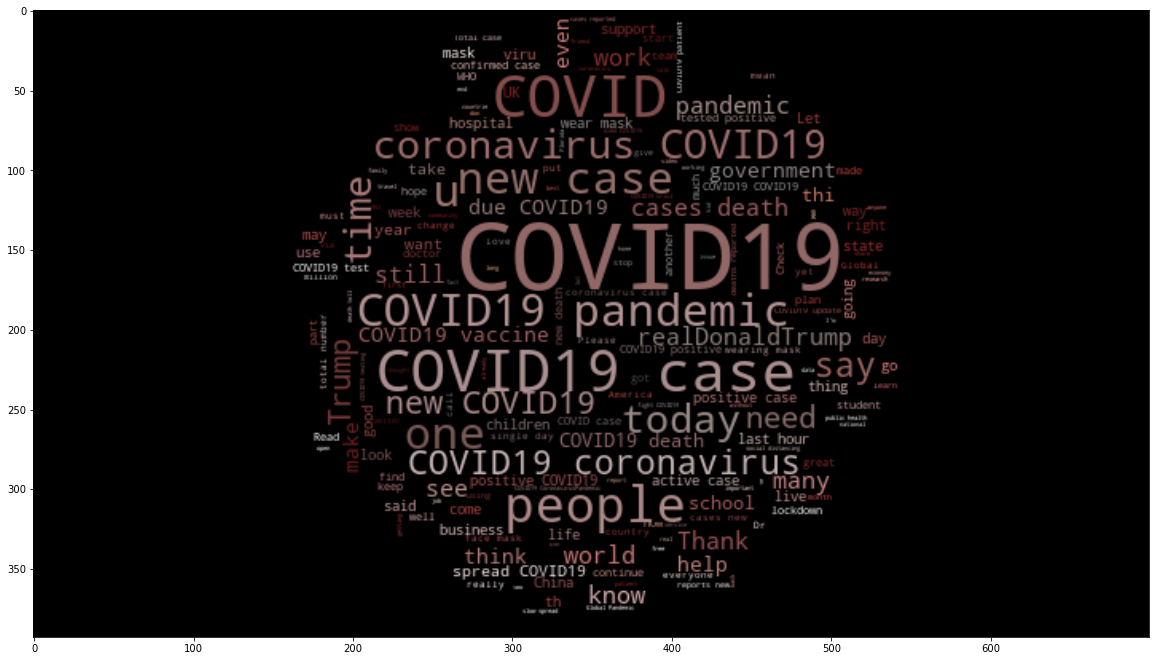

In [22]:
response = requests.get('https://miro.medium.com/proxy/1*SZq4F67FpMACqyQ1-doAFA.jpeg')
char_mask = np.array(Image.open(BytesIO(response.content)))
image_colors = ImageColorGenerator(char_mask)

plt.figure(figsize = (20,20))
wc = WordCloud(background_color="black", max_words=200, width=400, height=400, mask=char_mask, random_state=1).generate(" ".join(tweets.text))
# to recolour the image
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

# Sentiment Analysis

In [23]:
sid = SentimentIntensityAnalyzer()

tweets['sentiment_vader'] = tweets['text'].apply(lambda x: sid.polarity_scores(x)['compound'])
tweets['sentiment_textblob'] = tweets['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

**Negative Tweets: Top 15**

In [24]:
tweets.sort_values(by = 'sentiment_textblob')[['user_name', 'text',
                                               'sentiment_vader', 'sentiment_textblob']].head(15)

user_name  \
107567  Trish #VotedLabour 🖐️ #GTTO #ToryCorruption   
56530                              Friends of UNFPA   
116385                           Jugal Kishor Nagar   
37194                          Jimmy from the Bronx   
74287                                 Robert Ropars   
67338                                   eriksdotter   
116389                            vijayavardhanarao   
56483                                    Ron Vokoun   
116399                                Jonathan Chen   
116433                                 Subrahmanyam   
130853                                            E   
130532                                 Anna Aseyeva   
147880                                      Traci B   
147874                                      Traci B   
74385                                       Naya Z.   

                                                     text  sentiment_vader  \
107567  @SocialistVoice @maurlind would happened witho...          -0.6249   
56530   #Yemen worst humanitarian crisis world health ...          -0.8957   
116385  #अनंत_हेगड़े_माफ़ी_मांगो #BSNL_Pride_Of_India ...          -0.4767   
37194   @jim_bornholdt Yes, Jim, guess, shocking #MLB ...          -0.0772   
74287   #pandemic highlights gruesome animal abuses US...          -0.8442   
67338   @troublebubble @DavidLeyonhjelm @Terri168 1/ y...          -0.8271   
116389  #अनंत_हेगड़े_माफ़ी_मांगो #BSNL_Pride_Of_India ...          -0.4767   
56483   #COVID19 leads shocking #cloud computing bills...          -0.4019   
116399  @TVNZ wear mask. terrible staying face admitte...          -0.4767   
116433  #अनंत_हेगड़े_माफ़ी_मांगो #BSNL_Pride_Of_India ...          -0.4767   
130853  #CDC Director Warns: Mask Face Possibly Worst ...          -0.6705   
130532         #COVID19 isn’t horrible #FakeNews says is.          -0.5423   
147880  @realDonaldTrump 170,000+ Americans died #Trum...          -0.6679   
147874  @realDonaldTrump 170,000+ Americans died #Trum...          -0.6679   
74385   He’s sick y’all’s sh*t!! #wearyodamnmask #covi...          -0.5972   

        sentiment_textblob  
107567                -1.0  
56530                 -1.0  
116385                -1.0  
37194                 -1.0  
74287                 -1.0  
67338                 -1.0  
116389                -1.0  
56483                 -1.0  
116399                -1.0  
116433                -1.0  
130853                -1.0  
130532                -1.0  
147880                -1.0  
147874                -1.0  
74385                 -1.0

**Positive Tweets: Top 15**

In [25]:
#Positive Tweets
tweets.sort_values(by = 'sentiment_textblob', ascending = False)[['user_name', 'text', 'sentiment_vader', 'sentiment_textblob']].head(15)

user_name  \
155839                                     Stephen Hume   
30667                      Omar Yaxmehen Bello-Chavolla   
109442                                            Suee🌞   
109445                                      Haley Posey   
20820                                    Debasish Ghosh   
84487   Jambo Booth 🕷️#AllitTakeslsAllofUs 🌈 Girly Swot   
91625                                        Prince Obi   
23830                                         Rick Dost   
98585                                             Laura   
146500                                         Dee Blog   
155551                                  Anagha Sardesai   
100658                                 Hispanic Outlook   
56408                                SCG Emergency Svcs   
42446                                        swerve2019   
160101                                      Vague Panda   

                                                     text  sentiment_vader  \
155839  Working home causes surge security breaches, s...           0.7650   
30667   Excellent critique predictive modelling #COVID...           0.5719   
109442  Despite conditions world Make best world 🌎🌙 #p...           0.6369   
109445  volunteer great thing, changed life know chang...           0.6588   
20820   miss opportunity join best hospitality college...           0.8225   
84487   @cj_dinenage burden austerity #COVID19 falls g...           0.3182   
91625   gathering God's people Exciting!! Church getti...           0.8507   
23830   N95 mask best? What?! guarantee 100% protectio...           0.7925   
98585   Excellent, states this! #WearAMaskAsshole #COV...           0.6114   
146500  Yet another great reason #CancelRent, #StayHom...          -0.1759   
155551  Hindus around world celebrate #GaneshChaturthi...           0.8176   
100658  Face #Masks Work Types Offer Best #COVID19 Pro...           0.6369   
56408   Make emergency plan prepared hurricane season ...           0.2263   
42446   @realDonaldTrump @AirForceOne_HQ @FoxNews GET ...           0.4530   
160101  best @GavinNewsom offer praise @SenFeinstein l...           0.5719   

        sentiment_textblob  
155839                 1.0  
30667                  1.0  
109442                 1.0  
109445                 1.0  
20820                  1.0  
84487                  1.0  
91625                  1.0  
23830                  1.0  
98585                  1.0  
146500                 1.0  
155551                 1.0  
100658                 1.0  
56408                  1.0  
42446                  1.0  
160101                 1.0

**Neutral Tweets: Top15**

In [26]:
#Neutral Tweets
tweets[tweets['sentiment_textblob'] == 0.0][['user_name', 'text', 'sentiment_vader', 'sentiment_textblob']].head(15)

user_name  \
1                       Tom Basile 🇺🇸   
2                     Time4fisticuffs   
3                         ethel mertz   
4                            DIPR-J&K   
7                      Derbyshire LPC   
9   Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺   
10             Voice Of CBSE Students   
11                        Creativegms   
14                     DailyaddaaNews   
15                      Dimapur 24/7.   
16                     ChennaiCityNow   
17               marc goovaerts🇪🇺🏳️‍🌈   
18                         Dorian Aur   
21                  APO Group English   
24                     Florian Bieber   

                                                 text  sentiment_vader  \
1   Hey @Yankees @YankeesPR @MLB made sense player...           0.2263   
2   @diane3443 @wdunlap @realDonaldTrump Trump nev...           0.2057   
3   @brookbanktv one gift #COVID19 give appreciati...           0.7351   
4   25 July Media Bulletin Novel #CoronaVirusUpdat...           0.3182   
7   wear face coverings shopping includes visit lo...           0.0000   
9   POPE GOD Prophet Sadhu Sundar Selvaraj. Watch ...           0.4278   
10  49K+ Covid19 cases still response @cbseindia29...          -0.2500   
11  Order here: #logo #graphicdesigner #logodesign...           0.0000   
14  Rajasthan Government today started Plasma Bank...           0.0000   
15  Nagaland police Covid-19 Awareness City Tower ...           0.0000   
16  July 25 #COVID19 update #TamilNadu 6988 Discha...           0.0000   
17  Second wave #COVID19 Flanders..back #homework ...           0.0000   
18   darkest moments must focus see #light.~Aristotle          -0.4939   
21  Coronavirus South Africa: COVID-19 update Sout...           0.0000   
24                          Holy water times #COVID19           0.0000   

    sentiment_textblob  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
7                  0.0  
9                  0.0  
10                 0.0  
11                 0.0  
14                 0.0  
15                 0.0  
16                 0.0  
17                 0.0  
18                 0.0  
21                 0.0  
24                 0.0

# Results

In [27]:
#Combining all Dataframes (Positive, Neutral and Negative) and visualising the results...
neutral = tweets[tweets['sentiment_textblob'] == 0.0]
positive = tweets[tweets['sentiment_textblob'] > 0.0]
negative = tweets[tweets['sentiment_textblob'] < 0.0]

neutral['Sentiment Category'] = 'Neutral'
positive['Sentiment Category'] = 'Positive'
negative['Sentiment Category'] = 'Negative'

frames = [neutral, positive, negative]
result = pd.concat(frames)

In [28]:
colors = ['gold', 'mediumturquoise', 'darkorange']
fig = px.pie(result, values='count', names='Sentiment Category',
             color_discrete_sequence=px.colors.sequential.RdBu,
             title = 'Tweets Distribution Based on Sentiments')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

# The End